In [2]:
import matplotlib.pyplot as plt  # fine tune control over visualizations
import numpy as np  # to manipulate data/generate random numbers
import pandas as pd  # to read/manipulate/write data from files
import seaborn as sns  # static visualizations

from scipy.cluster.hierarchy import cophenet, linkage, dendrogram  # to perform cluster analysis
from scipy.spatial.distance import pdist, squareform  # to calculate distances and convert between condensed and square forms of a distance matrix
from sklearn.preprocessing import MinMaxScaler  # To standardize our data before clustering

In [3]:
subset_df = pd.read_csv("my_dataset.tsv",sep="\t")

In [4]:
subset_df.head()

,subjectkey,interview_date,interview_age,sex,site_id_l,anthroheightcalc,anthroweightcalc,ehi_y_ss_scoreb,neighborhood_crime_y,snellen_aid_y,...,pps_y_ss_severity_score,fit_ss_fitbit_totalsteps,prosocial_q3_y,fit_ss_sleepperiod_minutes,fit_ss_avg_hr_deep,smri_vol_cdk_total,smri_vol_scs_amygdalalh,smri_vol_scs_amygdalarh,mri_info_manufacturer,mri_info_magneticfieldstrength
0,NDAR_INVPH3H7TPD,10/15/2017,113,M,site08,41.0,54.00,1,5.0,0.0,...,0.0,10648.0,0.0,397.5,82.0,570545.0,1715.8,1758.2,GE MEDICAL SYSTEMS,3.0
1,NDAR_INVVNF9LTLB,08/14/2017,131,M,site08,63.8,134.00,3,5.0,0.0,...,7.0,24103.0,2.0,459.5,78.0,668907.0,1512.8,1587.6,GE MEDICAL SYSTEMS,3.0
2,NDAR_INVKVXP0RJF,07/25/2017,120,M,site19,56.0,84.75,1,4.0,0.0,...,20.0,15793.0,2.0,348.0,67.0,622311.0,1665.4,1778.0,Philips Medical Systems,3.0
3,NDAR_INVF1XKPBT6,06/03/2017,129,M,site19,60.0,88.00,1,5.0,0.0,...,0.0,20209.0,1.0,499.0,69.0,665177.0,2125.7,2225.4,Philips Medical Systems,3.0
4,NDAR_INVXM0N4RE4,10/01/2017,110,F,site10,54.5,76.50,1,4.0,0.0,...,17.0,7340.0,2.0,551.0,76.0,591362.0,1322.2,1437.0,GE MEDICAL SYSTEMS,3.0


In [5]:
subset_df.set_index("subjectkey", inplace=True)

In [6]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INVPH3H7TPD to NDAR_INVV0AKNDFH
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   interview_date                  1000 non-null   object 
 1   interview_age                   1000 non-null   int64  
 2   sex                             1000 non-null   object 
 3   site_id_l                       1000 non-null   object 
 4   anthroheightcalc                1000 non-null   float64
 5   anthroweightcalc                1000 non-null   float64
 6   ehi_y_ss_scoreb                 1000 non-null   int64  
 7   neighborhood_crime_y            1000 non-null   float64
 8   snellen_aid_y                   1000 non-null   float64
 9   ksads_1_2_t                     1000 non-null   int64  
 10  ksads_8_29_t                    1000 non-null   int64  
 11  ksads_25_33_t                   1000 non-null   int64  
 12  ksads_13_929

In [7]:
subset_df["interview_date"] = pd.to_datetime(subset_df["interview_date"])

In [8]:
subset_df.head()

,interview_date,interview_age,sex,site_id_l,anthroheightcalc,anthroweightcalc,ehi_y_ss_scoreb,neighborhood_crime_y,snellen_aid_y,ksads_1_2_t,...,pps_y_ss_severity_score,fit_ss_fitbit_totalsteps,prosocial_q3_y,fit_ss_sleepperiod_minutes,fit_ss_avg_hr_deep,smri_vol_cdk_total,smri_vol_scs_amygdalalh,smri_vol_scs_amygdalarh,mri_info_manufacturer,mri_info_magneticfieldstrength
subjectkey,,,,,,,,,,,,,,,,,,,,,
NDAR_INVPH3H7TPD,2017-10-15,113,M,site08,41.0,54.00,1,5.0,0.0,0,...,0.0,10648.0,0.0,397.5,82.0,570545.0,1715.8,1758.2,GE MEDICAL SYSTEMS,3.0
NDAR_INVVNF9LTLB,2017-08-14,131,M,site08,63.8,134.00,3,5.0,0.0,0,...,7.0,24103.0,2.0,459.5,78.0,668907.0,1512.8,1587.6,GE MEDICAL SYSTEMS,3.0
NDAR_INVKVXP0RJF,2017-07-25,120,M,site19,56.0,84.75,1,4.0,0.0,1,...,20.0,15793.0,2.0,348.0,67.0,622311.0,1665.4,1778.0,Philips Medical Systems,3.0
NDAR_INVF1XKPBT6,2017-06-03,129,M,site19,60.0,88.00,1,5.0,0.0,0,...,0.0,20209.0,1.0,499.0,69.0,665177.0,2125.7,2225.4,Philips Medical Systems,3.0
NDAR_INVXM0N4RE4,2017-10-01,110,F,site10,54.5,76.50,1,4.0,0.0,0,...,17.0,7340.0,2.0,551.0,76.0,591362.0,1322.2,1437.0,GE MEDICAL SYSTEMS,3.0


In [9]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INVPH3H7TPD to NDAR_INVV0AKNDFH
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   interview_date                  1000 non-null   datetime64[ns]
 1   interview_age                   1000 non-null   int64         
 2   sex                             1000 non-null   object        
 3   site_id_l                       1000 non-null   object        
 4   anthroheightcalc                1000 non-null   float64       
 5   anthroweightcalc                1000 non-null   float64       
 6   ehi_y_ss_scoreb                 1000 non-null   int64         
 7   neighborhood_crime_y            1000 non-null   float64       
 8   snellen_aid_y                   1000 non-null   float64       
 9   ksads_1_2_t                     1000 non-null   int64         
 10  ksads_8_29_t                    1000 non-null   in

In [10]:
cat_df = subset_df.select_dtypes(include=["object"])
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INVPH3H7TPD to NDAR_INVV0AKNDFH
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sex                    1000 non-null   object
 1   site_id_l              1000 non-null   object
 2   mri_info_manufacturer  1000 non-null   object
dtypes: object(3)
memory usage: 31.2+ KB


In [11]:
cat_df.head()

,sex,site_id_l,mri_info_manufacturer
subjectkey,,,
NDAR_INVPH3H7TPD,M,site08,GE MEDICAL SYSTEMS
NDAR_INVVNF9LTLB,M,site08,GE MEDICAL SYSTEMS
NDAR_INVKVXP0RJF,M,site19,Philips Medical Systems
NDAR_INVF1XKPBT6,M,site19,Philips Medical Systems
NDAR_INVXM0N4RE4,F,site10,GE MEDICAL SYSTEMS


In [12]:
cat_features = pd.get_dummies(cat_df, drop_first=True)

In [13]:
cat_features

,sex_M,site_id_l_site10,site_id_l_site19,mri_info_manufacturer_Philips Medical Systems
subjectkey,,,,
NDAR_INVPH3H7TPD,1,0,0,0
NDAR_INVVNF9LTLB,1,0,0,0
NDAR_INVKVXP0RJF,1,0,1,1
NDAR_INVF1XKPBT6,1,0,1,1
NDAR_INVXM0N4RE4,0,1,0,0
...,...,...,...,...
NDAR_INVDLXJMXAG,1,0,1,1
NDAR_INVLMY0XZB5,1,0,1,1
NDAR_INV3E6J6JJR,0,1,0,0


In [14]:
num_df = subset_df.select_dtypes(include=["int64", "float64"])

In [15]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INVPH3H7TPD to NDAR_INVV0AKNDFH
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   interview_age                   1000 non-null   int64  
 1   anthroheightcalc                1000 non-null   float64
 2   anthroweightcalc                1000 non-null   float64
 3   ehi_y_ss_scoreb                 1000 non-null   int64  
 4   neighborhood_crime_y            1000 non-null   float64
 5   snellen_aid_y                   1000 non-null   float64
 6   ksads_1_2_t                     1000 non-null   int64  
 7   ksads_8_29_t                    1000 non-null   int64  
 8   ksads_25_33_t                   1000 non-null   int64  
 9   ksads_13_929_t                  1000 non-null   int64  
 10  pps_y_ss_severity_score         1000 non-null   float64
 11  fit_ss_fitbit_totalsteps        1000 non-null   float64
 12  prosocial_q3

In [16]:
# Scale standardisation of numerical values
minmax = MinMaxScaler(feature_range=(0, 1))

num_features = pd.DataFrame(
    minmax.fit_transform(num_df),
    index=num_df.index,
    columns=num_df.columns
)

In [17]:
df_scaled = pd.concat([num_features, cat_features], axis="columns")

# Confirm that all data lies between zero and one.
print(f"Data min, max: {df_scaled.min().min(), df_scaled.max().max()}")

Data min, max: (0.0, 1.0)


In [18]:
!pip install gower

In [20]:
import gower

In [21]:
# Get the Gower's distance matrix
Y = gower.gower_matrix(df_scaled.T).astype(np.float64)

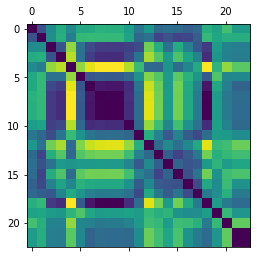

In [22]:
plt.matshow(Y)

In [23]:
# That result was in "uncondensed form". Let's use a scipy convenience
# function to convert it into a condensed array form. This stores only
# the upper triangular part since `Y` is a symmetric matrix.
Y = squareform(Y)

In [24]:
Z = linkage(Y, method="complete", optimal_ordering=True)

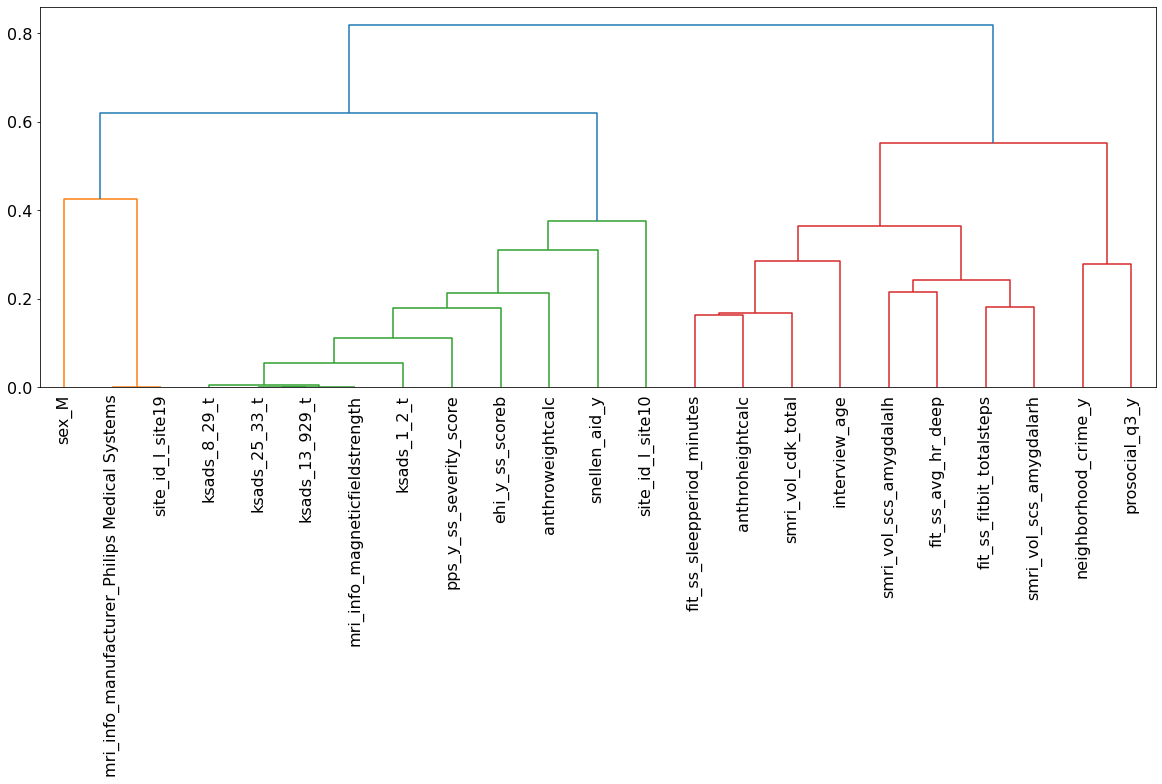

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
dn = dendrogram(
    Z,
    ax=ax,
    orientation="top",
    distance_sort='descending',
    show_leaf_counts=True,
)

# `dn["ivl"] stores a list of the feature indices in the order they appear on the x axis.
# Let's label the x-axis using the actual feature names rather than the indices
_ = ax.set_xticklabels(
    [list(df_scaled.columns)[int(i)] for i in dn["ivl"]],
    rotation=90,
    fontsize=16,
)

yticks = np.linspace(0.0, 0.8, 5)
_ = ax.set_yticks(yticks)
_ = ax.set_yticklabels([round(y, 1) for y in yticks], fontsize=16)

#I ran into trouble changing some of the variables, so this closely resembles the example code

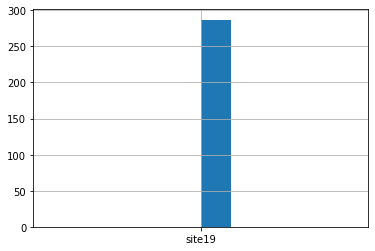

In [26]:
_ = subset_df[subset_df["mri_info_manufacturer"] == "Philips Medical Systems"]["site_id_l"].hist()

In [30]:
Z = linkage(Y, method="average", optimal_ordering=True)
c, coph_dists = cophenet(Z, pdist(df_scaled.T.values, "euclidean"))
print(f"Cophenetic correlation coefficient: {c}")

Cophenetic correlation coefficient: 0.7145740248859851
